# 1. import Libraries


In [ ]:
from google.colab import drive
from PIL import Image
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
import requests
from skimage.color import rgb2gray, rgba2rgb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 2. Run this block to receive images

In [ ]:
circuit_file_id = '11-c-JbKJf1XXWsvMWAAJfrMh8rzhYmLa'
circuit_url = f'https://drive.google.com/uc?id={circuit_file_id}'

rough_file_id = '1LmzfcacPB3jHlWP0LQsAab7hUG7srQwK'
rough_url = f'https://drive.google.com/uc?id={rough_file_id}'

smooth_file_id = '1VSs4d8n6qoOZaXjm3Kv3RkS2_SIDh-U2'
smooth_url = f'https://drive.google.com/uc?id={smooth_file_id}'

periodic_file_id = '1LXqshoVIsmi6KpDA_dwl-icX7i0SSu3T'
periodic_url = f'https://drive.google.com/uc?id={periodic_file_id}'

random_file_id = '1s4VKPNcoNd5nxYo5AAfGJ9wY62zPyk4h'
random_url = f'https://drive.google.com/uc?id={random_file_id}'

def get_file(url, name, format):
  response = requests.get(url)
  if response.status_code == 200:
      with open(f'{name}.{format}', 'wb') as f:
          f.write(response.content)

get_file(circuit_url, 'Circuit', 'png')
get_file(rough_url, 'Rough', 'jpg')
get_file(smooth_url, 'Smooth', 'png')
get_file(periodic_url, 'Periodic', 'png')
get_file(random_url, 'Random', 'png')

# 3. Display images

## 3.1 Group one

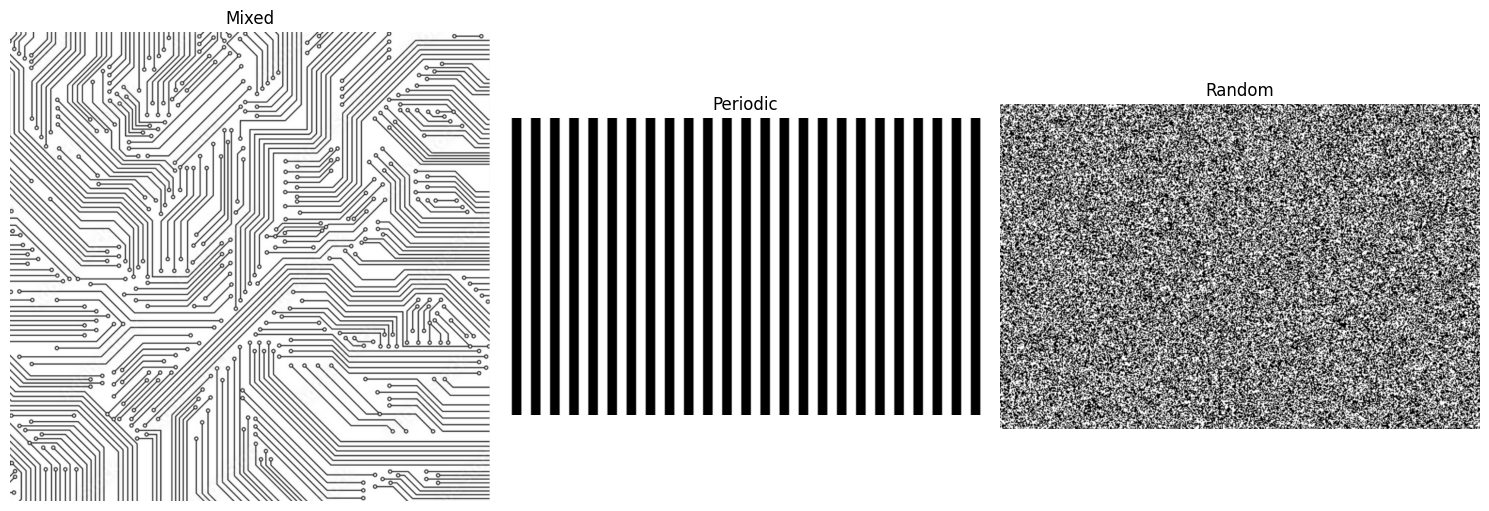

In [ ]:
smooth = mpimg.imread('Smooth.png')
rough = mpimg.imread('Rough.jpg')
circuit = mpimg.imread('Circuit.png')
periodic = mpimg.imread('Periodic.png')
random = mpimg.imread('Random.png')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, img, title in zip(axs, [circuit, periodic, random], ['Mixed', 'Periodic', 'Random']):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## 3.2 Group two


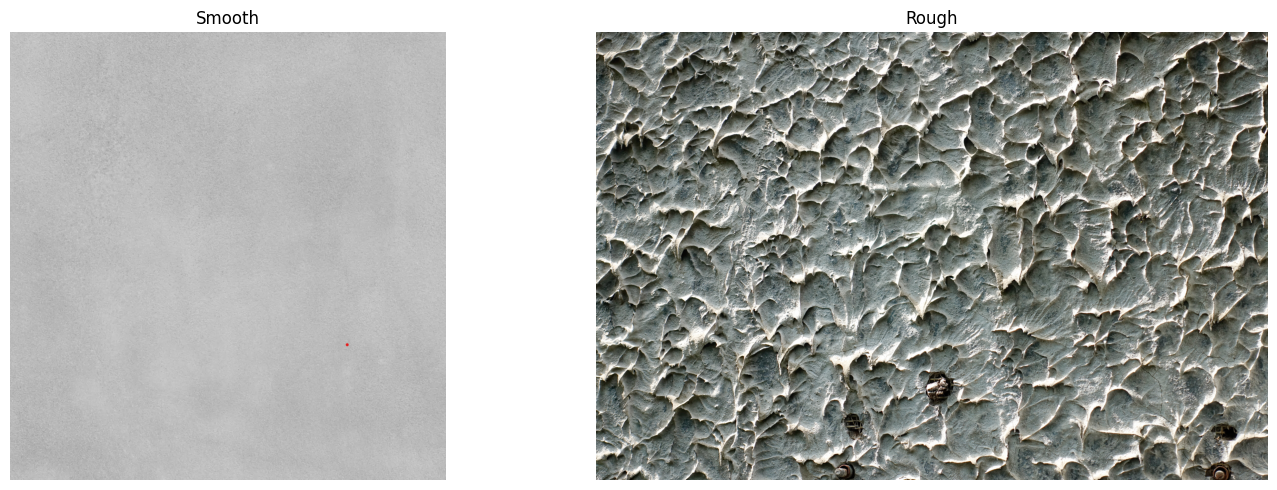

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for ax, img, title in zip(axs, [smooth, rough], ['Smooth', 'Rough']):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

# 4. Generate GLCM's

In [ ]:
smooth_gray = (255*rgb2gray(rgba2rgb(smooth))).astype(np.uint8)
rough_gray = (255*rgb2gray(np.array(rough))).astype(np.uint8)
circuit_gray = (255*rgb2gray(rgba2rgb(circuit))).astype(np.uint8)
periodic_gray = (255*rgb2gray(rgba2rgb(periodic))).astype(np.uint8)
random_gray = (255*rgb2gray(rgba2rgb(random))).astype(np.uint8)

# Generate GLCM
distances = [2] # Offset
angles = [np.pi/2 * 0]

def create_glcm(gray_image, distances, angels):
  glcm = graycomatrix(gray_image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
  return glcm

glcm_smooth = create_glcm(smooth_gray, distances, angles)
glcm_rough = create_glcm(rough_gray, distances, angles)
glcm_circuit = create_glcm(circuit_gray, distances, angles)
glcm_periodic = create_glcm(periodic_gray, distances, angles)
glcm_random = create_glcm(random_gray, distances, angles)

# 5. Extract Statistics from GLCM's

In [ ]:
stats_smooth = {}
stats_rough = {}
stats_circuit = {}
stats_periodic = {}
stats_random = {}

def run_graycoprops(glcm, stats, gray_image):
  for prop in ['contrast', 'dissimilarity', 'homogeneity', 'energy',  'entropy' ,'correlation']:
    stats[prop] = graycoprops(glcm, prop)
  return stats

stats_smooth = run_graycoprops(glcm_smooth, stats_smooth, smooth_gray)
stats_rough = run_graycoprops(glcm_rough, stats_rough, rough_gray)
stats_circuit = run_graycoprops(glcm_circuit, stats_circuit, circuit_gray)
stats_periodic = run_graycoprops(glcm_periodic, stats_periodic, periodic_gray)
stats_random = run_graycoprops(glcm_random, stats_random, random_gray)

# 6. Compare Groups

## 6.1 Group one


In [ ]:
def print_stats(stats, image_name):
  print(f'\nGLCM Measures of {image_name} Texture:')
  for prop, value in stats.items():
    print(f'{prop}: {value[0][0]}')

In [ ]:
print('First Group to compare:')
print_stats(stats_periodic, 'Periodic')
print_stats(stats_circuit, 'Mixed')
print_stats(stats_random, 'Random')

First Group to compare:

GLCM Measures of Periodic Texture:
contrast: 2668.895366218236
dissimilarity: 18.983557548579974
homogeneity: 0.790268174056528
energy: 0.5540340142936618
entropy: 2.3337932842081237
correlation: 0.9110865530424683

GLCM Measures of Mixed Texture:
contrast: 3284.416492279334
dissimilarity: 28.463876609405986
homogeneity: 0.48135143948955617
energy: 0.23544498674761166
entropy: 6.072258401907648
correlation: 0.6542629001127156

GLCM Measures of Random Texture:
contrast: 7085.693963267124
dissimilarity: 64.64440889992359
homogeneity: 0.07368887809497196
energy: 0.019036193050293353
entropy: 10.076047127552435
correlation: 0.48489167508125314


## 6.2 Group two

In [ ]:
print("Second Group to compare:")
print_stats(stats_smooth, 'Smooth')
print_stats(stats_rough, 'Rough')

Second Group to compare:

GLCM Measures of Smooth Texture:
contrast: 43.82199591066373
dissimilarity: 4.8491656335387265
homogeneity: 0.23433727716630054
energy: 0.07023198638452748
entropy: 5.861933613737675
correlation: 0.46398518742692924

GLCM Measures of Rough Texture:
contrast: 471.02219367402745
dissimilarity: 13.799091084945
homogeneity: 0.10899061303899613
energy: 0.011864135348092532
entropy: 9.507016580752152
correlation: 0.9205074602888466
